<a href="https://colab.research.google.com/github/SaryLibreros/DataScienceFem_Retos/blob/main/nobelLaureates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

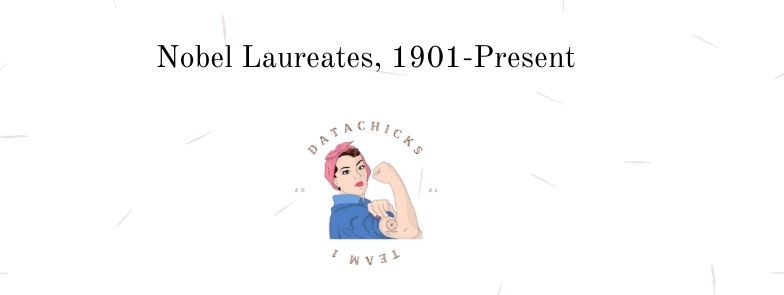






### Descripción del reto

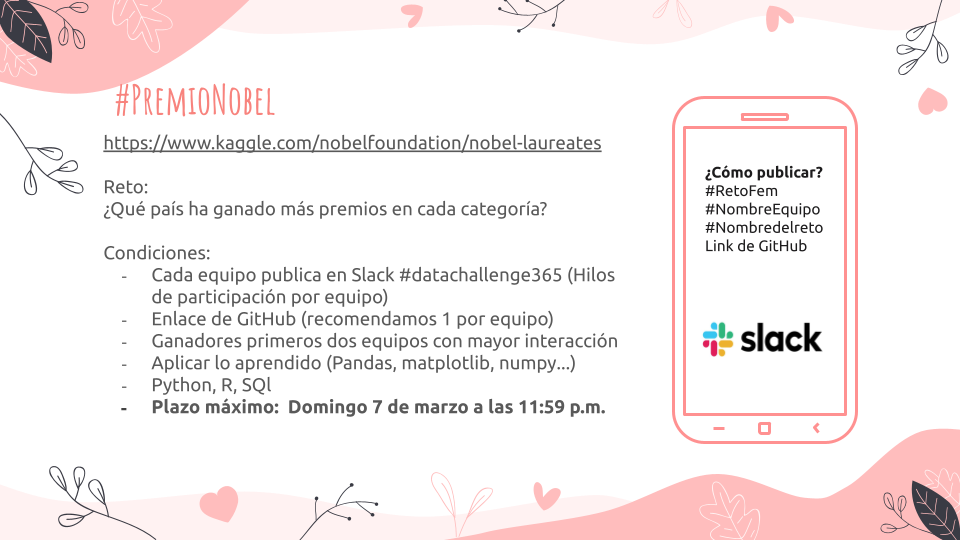

En este reto vamos a responder la siguiente pregunta:

**¿Qué país ha ganado más premios en cada categoría?**

Datos obtenidos de: [Nobel Laureates, 1901-Present - Kaggle](https://www.kaggle.com/nobelfoundation/nobel-laureates)

**Contexto:**

Entre 1901 y 2016, los Premios Nobel y el Premio de Ciencias Económicas fueron entregados 579 veces a 911 personas y organizaciones. El Premio Nobel es un premio internacional administrado por la Fundación Nobel en Estocolmo, Suecia, y basado en la fortuna de Alfred Nobel, inventor y empresario sueco. En 1968, Sveriges Riksbank estableció el Premio Sveriges Riksbank en Ciencias Económicas en memoria de Alfred Nobel, fundador del Premio Nobel. Cada premio consta de una medalla, un diploma personal y un premio en efectivo.

Una persona u organización galardonada con el Premio Nobel se denomina Premio Nobel. La palabra "laureado" se refiere al significado de la corona de laurel. En la antigua Grecia, se otorgaban coronas de laurel a los vencedores como señal de honor.

## Carga de datos e importar librerias

Importando librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Cargamos el archivo

In [ ]:
nobel = pd.read_csv("archive.csv")

Visualizamos el DataFrame

In [ ]:
nobel.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## Descripción de datos

Tamaño del DataFrame (filas, columnas)

In [ ]:
nobel.shape

(969, 18)

Información de columnas

In [ ]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

Como podemos ver de 969 filas en la columna 'Birth Country' solo tenemos 943. A continuación veremos la cantidad de valores null por columna.

Cantidad de valores null



In [ ]:
nobel.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

# Exploración datos con un ejemplo puntual 
En el año 2016 ganaron un premio de Química tres personas (Jean-Pierre Sauvage, Sir J. Fraser Stoddart, Bernard L. Feringa) cada uno de ellos perteneciente a un país diferente, a raíz de esto nace una incógnita *¿A qué país se le otorga este premio?*


In [ ]:
nobel_2016=nobel[nobel['Year']==2016]
nobel_Che=nobel_2016[nobel_2016['Category']=="Chemistry"]
nobel_Che.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
958,2016,Chemistry,The Nobel Prize in Chemistry 2016,"""for the design and synthesis of molecular mac...",1/3,931,Individual,Jean-Pierre Sauvage,1944-10-21,Paris,France,Male,University of Strasbourg,Strasbourg,France,NaN,NaN,NaN
959,2016,Chemistry,The Nobel Prize in Chemistry 2016,"""for the design and synthesis of molecular mac...",1/3,932,Individual,Sir J. Fraser Stoddart,1942-05-24,Edinburgh,United Kingdom,Male,Northwestern University,"Evanston, IL",United States of America,NaN,NaN,NaN
960,2016,Chemistry,The Nobel Prize in Chemistry 2016,"""for the design and synthesis of molecular mac...",1/3,933,Individual,Bernard L. Feringa,1951-05-18,Barger-Compascuum,Netherlands,Male,University of Groningen,Groningen,Netherlands,NaN,NaN,NaN


# Exploración Categorías

Las categorías premiadas son:

In [ ]:
category = nobel['Category'].unique()
print(category)

['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


Categorias y cantidad de premiados:

In [ ]:
tipos = nobel.groupby('Category').count()[['Birth Country']].sort_values(by='Birth Country',ascending=True).reset_index()
tipos = tipos.rename(columns={'Birth Country':'cantidad de premiados'})
print(tipos)

     Category  cantidad de premiados
0   Economics                     83
1       Peace                    104
2  Literature                    113
3   Chemistry                    194
4     Physics                    222
5    Medicine                    227


Categorias y cantidad de premios:

In [ ]:
cantidad_premios=nobel.groupby('Category').Prize.nunique().sort_values(ascending=True).reset_index()
cantidad_premios = cantidad_premios.rename(columns={'Prize':'cantidad de premios'})
print(cantidad_premios)

     Category  cantidad de premios
0   Economics                   48
1       Peace                   97
2    Medicine                  107
3   Chemistry                  108
4  Literature                  109
5     Physics                  110


# Descripción por categoria



Listamos los 20 paises con mayor número de premiados

In [ ]:
nobel['Birth Country'].value_counts().head(20)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Denmark                      11
Australia                    11
Germany (Poland)             10
Scotland                      9
South Africa                  9
Belgium                       9
Name: Birth Country, dtype: int64

Se crea data frame con las organizaciones y verificamos la información obtenida

In [ ]:
orgDF = nobel[nobel["Laureate Type"] == "Organization"]
orgDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 24 to 955
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  30 non-null     int64 
 1   Category              30 non-null     object
 2   Prize                 30 non-null     object
 3   Motivation            11 non-null     object
 4   Prize Share           30 non-null     object
 5   Laureate ID           30 non-null     int64 
 6   Laureate Type         30 non-null     object
 7   Full Name             30 non-null     object
 8   Birth Date            4 non-null      object
 9   Birth City            4 non-null      object
 10  Birth Country         4 non-null      object
 11  Sex                   4 non-null      object
 12  Organization Name     0 non-null      object
 13  Organization City     0 non-null      object
 14  Organization Country  0 non-null      object
 15  Death Date            2 non-null      ob

Como podemos observar hay en total 30 organizaciones, de las cuales tenemos la mayoría de datos en null y solo tenemos información de los países en 4 organizaciones.

Aquí vemos que las organizaciones solo han ganado el premio nobel de paz

Reemplazamos valores null en país de nacimiento por 'sin pais'

In [ ]:
nobel['Birth Country'].fillna('Sin pais', inplace=True)

**Premio Nobel de Paz**

In [ ]:
PeaceDF = nobel[(nobel.Category == 'Peace')]
PeaceDF.info()
print("\n ----Países con más premiados ganados en Nobel de Paz----")
#Aquí incluimos los datos null ya que hacen parte de las organizaciones
Peace=PeaceDF['Birth Country'].value_counts(dropna=False).head(1).reset_index()
Peace['Category']='Peace'
Peace=Peace.rename(columns={'index':'Pais','Birth Country':'Cantidad'})
print(Peace)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 3 to 965
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  130 non-null    int64 
 1   Category              130 non-null    object
 2   Prize                 130 non-null    object
 3   Motivation            42 non-null     object
 4   Prize Share           130 non-null    object
 5   Laureate ID           130 non-null    int64 
 6   Laureate Type         130 non-null    object
 7   Full Name             130 non-null    object
 8   Birth Date            104 non-null    object
 9   Birth City            103 non-null    object
 10  Birth Country         130 non-null    object
 11  Sex                   104 non-null    object
 12  Organization Name     4 non-null      object
 13  Organization City     4 non-null      object
 14  Organization Country  4 non-null      object
 15  Death Date            72 non-null     ob

**Premio Nobel de Química**

In [ ]:
ChemistryDF = nobel[(nobel.Category == 'Chemistry')]
ChemistryDF.info()
print("\n ----País con más premiados ganados en Química----")
#print(ChemistryDF['Birth Country'].mode())
Chemistry=ChemistryDF['Birth Country'].value_counts(dropna=False).head(1).reset_index()
Chemistry['Category']='Chemistry'
Chemistry=Chemistry.rename(columns={'index':'Pais','Birth Country':'Cantidad'})
print(Chemistry)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 960
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  194 non-null    int64 
 1   Category              194 non-null    object
 2   Prize                 194 non-null    object
 3   Motivation            194 non-null    object
 4   Prize Share           194 non-null    object
 5   Laureate ID           194 non-null    int64 
 6   Laureate Type         194 non-null    object
 7   Full Name             194 non-null    object
 8   Birth Date            193 non-null    object
 9   Birth City            194 non-null    object
 10  Birth Country         194 non-null    object
 11  Sex                   194 non-null    object
 12  Organization Name     192 non-null    object
 13  Organization City     188 non-null    object
 14  Organization Country  189 non-null    object
 15  Death Date            122 non-null    ob

**Premio Nobel de Literatura**

In [ ]:
LiteratureDF = nobel[(nobel.Category == 'Literature')]
LiteratureDF.info()
print("\n ----País con más premiados ganados en Literatura----")
#LiteratureDF['Birth Country'].mode()
Literature=LiteratureDF['Birth Country'].value_counts(dropna=False).head(1).reset_index()
Literature['Category']='Literature'
Literature=Literature.rename(columns={'index':'Pais','Birth Country':'Cantidad'})
print(Literature)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 1 to 963
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  113 non-null    int64 
 1   Category              113 non-null    object
 2   Prize                 113 non-null    object
 3   Motivation            113 non-null    object
 4   Prize Share           113 non-null    object
 5   Laureate ID           113 non-null    int64 
 6   Laureate Type         113 non-null    object
 7   Full Name             113 non-null    object
 8   Birth Date            113 non-null    object
 9   Birth City            112 non-null    object
 10  Birth Country         113 non-null    object
 11  Sex                   113 non-null    object
 12  Organization Name     0 non-null      object
 13  Organization City     0 non-null      object
 14  Organization Country  0 non-null      object
 15  Death Date            96 non-null     ob

**Premio Nobel de Medicina**

In [ ]:
MedicineDF = nobel[(nobel.Category == 'Medicine')]
MedicineDF.info()
print("\n ----País con más premiados ganados en Medicina----")
#MedicineDF['Birth Country'].mode()
Medicine=MedicineDF['Birth Country'].value_counts(dropna=False).head(1).reset_index()
Medicine['Category']='Medicine'
Medicine=Medicine.rename(columns={'index':'Pais','Birth Country':'Cantidad'})
print(Medicine)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 2 to 964
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  227 non-null    int64 
 1   Category              227 non-null    object
 2   Prize                 227 non-null    object
 3   Motivation            227 non-null    object
 4   Prize Share           227 non-null    object
 5   Laureate ID           227 non-null    int64 
 6   Laureate Type         227 non-null    object
 7   Full Name             227 non-null    object
 8   Birth Date            227 non-null    object
 9   Birth City            227 non-null    object
 10  Birth Country         227 non-null    object
 11  Sex                   227 non-null    object
 12  Organization Name     225 non-null    object
 13  Organization City     222 non-null    object
 14  Organization Country  221 non-null    object
 15  Death Date            154 non-null    ob

**Premio Nobel de Fisica**

In [ ]:
PhysicsDF = nobel[(nobel.Category == 'Physics')]
PhysicsDF.info()
print("\n ----País con más premiados ganados en Física----")
#PhysicsDF['Birth Country'].mode()
Physic=PhysicsDF['Birth Country'].value_counts(dropna=False).head(1).reset_index()
Physic['Category']='Physic'
Physic=Physic.rename(columns={'index':'Pais','Birth Country':'Cantidad'})
print(Physic)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 5 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  222 non-null    int64 
 1   Category              222 non-null    object
 2   Prize                 222 non-null    object
 3   Motivation            222 non-null    object
 4   Prize Share           222 non-null    object
 5   Laureate ID           222 non-null    int64 
 6   Laureate Type         222 non-null    object
 7   Full Name             222 non-null    object
 8   Birth Date            220 non-null    object
 9   Birth City            222 non-null    object
 10  Birth Country         222 non-null    object
 11  Sex                   222 non-null    object
 12  Organization Name     220 non-null    object
 13  Organization City     221 non-null    object
 14  Organization Country  221 non-null    object
 15  Death Date            131 non-null    ob

**Premio Nobel de Economia**

In [ ]:
EconomicsDF = nobel[(nobel.Category == 'Economics')]
EconomicsDF.info()
print("\n ----País con más premiados ganados en Economía----")
#EconomicsDF['Birth Country'].mode()
Economics=EconomicsDF['Birth Country'].value_counts(dropna=False).head(1).reset_index()
Economics['Category']='Economics'
Economics=Economics.rename(columns={'index':'Pais','Birth Country':'Cantidad'})
print(Economics)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 410 to 962
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  83 non-null     int64 
 1   Category              83 non-null     object
 2   Prize                 83 non-null     object
 3   Motivation            83 non-null     object
 4   Prize Share           83 non-null     object
 5   Laureate ID           83 non-null     int64 
 6   Laureate Type         83 non-null     object
 7   Full Name             83 non-null     object
 8   Birth Date            83 non-null     object
 9   Birth City            83 non-null     object
 10  Birth Country         83 non-null     object
 11  Sex                   83 non-null     object
 12  Organization Name     81 non-null     object
 13  Organization City     81 non-null     object
 14  Organization Country  81 non-null     object
 15  Death Date            42 non-null     o

# Visualización de datos

Consultamos los diez paises que han más han ganado el premio nobel

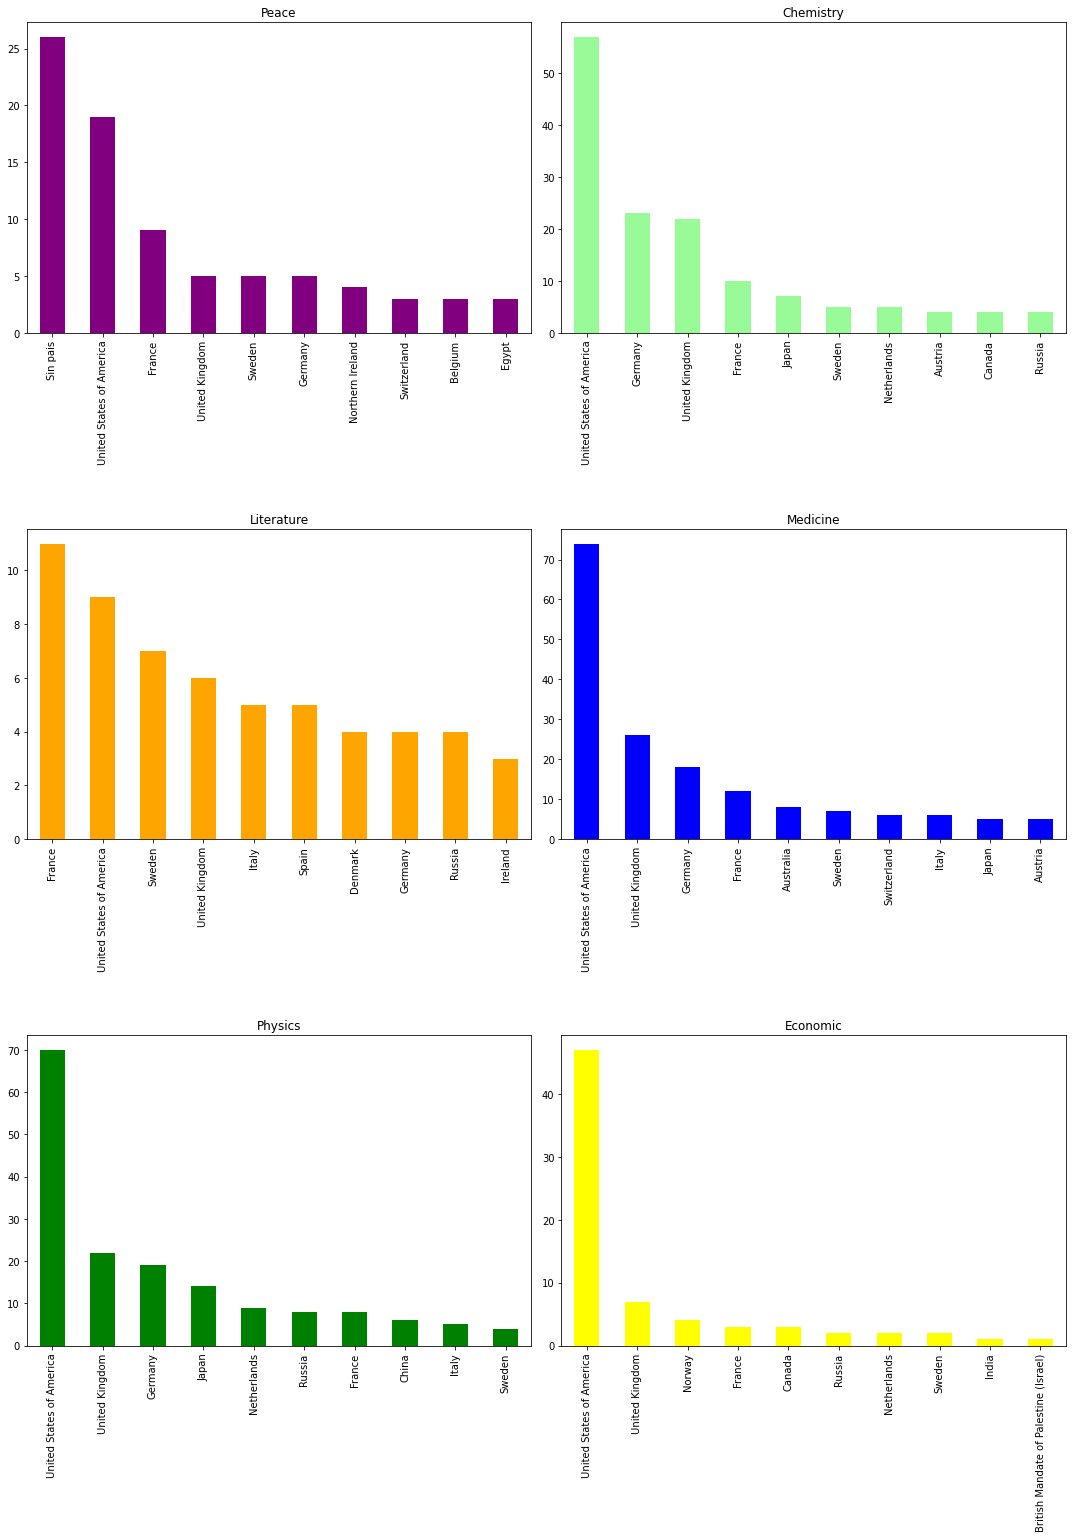

In [ ]:
plt.figure(figsize=(15,40))

premiosDF = [PeaceDF['Birth Country'], ChemistryDF['Birth Country'], LiteratureDF['Birth Country'], MedicineDF['Birth Country'], 
             PhysicsDF['Birth Country'], EconomicsDF['Birth Country']]  

colores = ['purple','palegreen','orange','blue','green','yellow']  

titulos = ['Peace', 'Chemistry', 'Literature', 'Medicine', 'Physics', 'Economic']

for i in range(0,len(premiosDF)):
  plt.subplot(6,2,i+1)
  countryPeace = premiosDF[i].value_counts(dropna=False).head(10)
  countryPeace.plot(kind= 'bar', color=colores[i])
  plt.title(titulos[i])

plt.tight_layout()
plt.show()

**Premios ganados por Tipo de Laureado y Categoria**

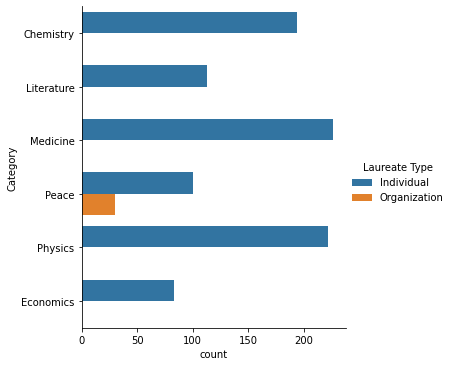

In [ ]:
sns.catplot(y='Category',data=nobel,kind='count',hue='Laureate Type')

**Premios ganados por genero y categoría**

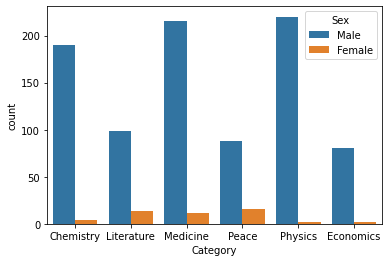

In [ ]:
sns.countplot(x='Category',data=nobel,hue='Sex')
plt.show()

Validar si hay valores duplicados:

In [ ]:
nobel.duplicated().any()

False

**Premios Nobel de Colombianos**

In [ ]:
nobel[nobel['Birth Country']=='Colombia']

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
549,1982,Literature,The Nobel Prize in Literature 1982,"""for his novels and short stories, in which th...",1/1,659,Individual,Gabriel García Márquez,1927-03-06,Aracataca,Colombia,Male,NaN,NaN,NaN,2014-04-17,Mexico City,Mexico
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN


# Resultado

País con más premiados por categoría:

In [ ]:
data_pais_premiados= pd.concat([Peace,Chemistry,Literature, Medicine, Physic,Economics])
print(data_pais_premiados)

                       Pais  Cantidad    Category
0                  Sin pais        26       Peace
0  United States of America        57   Chemistry
0                    France        11  Literature
0  United States of America        74    Medicine
0  United States of America        70      Physic
0  United States of America        47   Economics


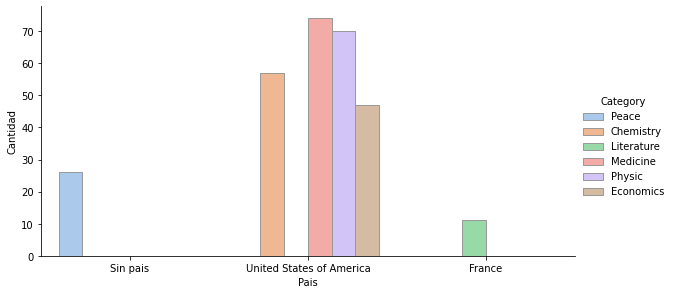

In [ ]:
sns.catplot(x='Pais', y='Cantidad',data=data_pais_premiados,kind='bar',
hue='Category', legend='True', palette="pastel", edgecolor=".6", height = 4, aspect = 2)

# Conclusión

**El premio Nobel** es una distinción máxima que ha sido entregada desde el año 1901 a los grandes científicos y actores del cambio en seis diferentes categorías como Física, Química, Medicina, Literatura, Paz y Economía.

Por medio del dataset “**Nobel Laureates**” proporcionado por **Kaggle** realizamos un análisis exploratorio en el que pudimos contextualizar y obtener información de sus categorías, de los países con mayor número de premiados, del género de los nobels, de la participación de las organizaciones y de los reconocimientos que ha recibido Colombia.
Además, visualizamos, por medio de gráficos de barras, los diez países con mayor número de galardonados por categoría, el tipo de distinción que se ha recibido, el género más reconocido y finalmente el país con más premiados por categoría. 

Para este ejercicio, implementamos **Python** como lenguaje principal y algunas de sus librerías como **Pandas, Matplotlib, Seaborn**. Además de correr el archivo en Colab para que todo el equipo pudiera aportar a la realización del reto. 

Frente a este panorama, **Estados Unidos** se ha posicionado como el país más galardonado gracias a sus aportes en las categorías de **Química, Medicina, Física y Economía**. 
En la categoría de **literatura** tenemos a **Francia** como el país más sobresaliente y en la categoría de **Paz** hemos encontrado que **no tiene un país especifico**. Sin embargo, gracias a la investigación previa definimos que se debe a que **diferentes organizaciones**, como la ONU, OPAQ, IPB, CICR, UNICEF, ICAN, WFP, han sido premiadas por su labor en torno a propiciar un ambiente más equitativo, justo y pacifico en el mundo. 

Entre las **categorías más premiadas** a nivel general se destacan **Medicina, Física y Química**. 


A lo largo de la historia de estos premios, sólo en 52 ocasiones las galardonadas con el Nobel han sido mujeres. El Nobel de la Paz es el que ha tenido más en cuenta a las mujeres, con 17 premiadas, seguido por el Nobel de Literatura, que ha distinguido a 14 escritoras. Es decir, solo se ha exaltado la **participación de las mujeres** en categorías como **medicina, literatura y paz.**
